In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import torch
import logging
logging.basicConfig(level=logging.ERROR)
# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r "/content/drive/My Drive/research_lo_content_taxonomy_classification/model_euclidean_dual_bert_1_khan_acad/" /content/
!cp -r "/content/drive/My Drive/research_lo_content_taxonomy_classification/model_euclidean_dual_bert_2_khan_acad/" /content/

In [ ]:
!pip install transformers==2.8.0

In [ ]:
!pip install git+https://github.com/geoopt/geoopt.git
! pip install git+https://github.com/ferrine/hyrnn.git

  Cloning https://github.com/geoopt/geoopt.git to /tmp/pip-req-build-sr6m99vi
  Running command git clone -q https://github.com/geoopt/geoopt.git /tmp/pip-req-build-sr6m99vi
  Created wheel for geoopt: filename=geoopt-0.3.1-cp37-none-any.whl size=76168 sha256=52b1d900591ac8d94f12aa90e1d1db9d2c6f3bd3f76cbfeaee55356d0d7bb987
  Stored in directory: /tmp/pip-ephem-wheel-cache-czg1qhru/wheels/10/df/30/e0d857f034c142ca5f38af048b62aae3da773b272553e5dd21
Successfully built geoopt
  Cloning https://github.com/ferrine/hyrnn.git to /tmp/pip-req-build-1wg_kp7a
  Running command git clone -q https://github.com/ferrine/hyrnn.git /tmp/pip-req-build-1wg_kp7a
  Created wheel for hyrnn: filename=hyrnn-0.0.0-cp37-none-any.whl size=13955 sha256=7900e349800485e9e79f70bb349593dc995b9368374bc9fe74d0882dd34ab83a
  Stored in directory: /tmp/pip-ephem-wheel-cache-830s83rp/wheels/24/c3/64/cc0e9d25d466081dc154a2a8843157f54d845b916b4ba66418
Successfully built hyrnn


In [ ]:
!cp "/content/drive/MyDrive/Information_retrieval_project/khan_acad/train_khan_acad.csv" /content
!cp "/content/drive/MyDrive/Information_retrieval_project/khan_acad/test_khan_acad.csv" /content
!cp "/content/drive/MyDrive/Information_retrieval_project/khan_acad/val_khan_acad.csv" /content


In [ ]:
import pandas as pd
train_data = pd.read_csv("train_khan_acad.csv")
val_data = pd.read_csv("val_khan_acad.csv")
test_data = pd.read_csv("test_khan_acad.csv")

train_data


,video_transcripts,hierarchy
0,In the last couple of videos we saw that we c...,math>>multivariable-calculus>>multivariable-de...
1,- What we're going to do in this video is gi...,science>>ap-biology>>natural-selection
2,"So once again, we have three equal, or we say...",math>>pre-algebra>>pre-algebra-equations-expre...
3,- Liz's math test included a survey question...,math>>engageny-alg-1>>alg1-2
4,- The following two equations form a linear s...,math>>algebra-home>>alg-system-of-equations
...,...,...
4183,- Hello everyone. So this is what I might ca...,math>>multivariable-calculus>>multivariable-de...
4184,- Let's try now to subtract some two-digit n...,math>>early-math>>cc-early-math-add-sub-100
4185,- Let's say that I have a circle. My best att...,math>>engageny-geo>>geo-5
4186,- So let's look at the female reproductive cy...,science>>health-and-medicine>>human-anatomy-an...


In [ ]:
set(train_data["video_transcripts"].values).intersection(set(test_data["video_transcripts"].values))

set()

In [ ]:
from google.colab import files

In [ ]:
import re
def clean_sentence(question):
  # print(question)
  question = re.sub('<[^>]*>', ' ',question)
  question = re.sub(' +', ' ', question)
  question = re.sub('\xa0','',question)
  question = question.rstrip()
  question = re.sub('nan','',question)
  question = re.sub(u'\u2004','',question)
  question = re.sub(u'\u2009','',question)

  # question = question.decode("utf-8")
  # question = question.replace(u'\u200\d*','').encode("utf-8")
  question = re.sub('&nbsp','',question)
  question = re.sub('&ndash','',question)
  question = re.sub('\r','',question)
  question = re.sub('\t','',question)
  question = re.sub('\n',' ',question)

  question = re.sub('MathType@.*','',question)
  question = re.sub('&thinsp','',question)
  question = re.sub('&times','',question)
  question = re.sub('\u200b','',question)
  question = re.sub('&rarr;;;','',question)

  return question

In [ ]:
# final_data_1 = final_data.loc[0:71003,:]
# final_data_1

In [ ]:
import transformers
print(transformers.__version__)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

2.8.0


In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [ ]:
train_data["hierarchy"].value_counts()

science>>health-and-medicine>>circulatory-system-diseases                   99
science>>health-and-medicine>>human-anatomy-and-physiology                  65
science>>health-and-medicine>>respiratory-system-diseases                   55
science>>health-and-medicine>>circulatory-system                            54
science>>health-and-medicine>>infectious-diseases                           52
                                                                            ..
math>>algebra-basics>>alg-basics-expressions-with-exponents                  1
math>>ap-statistics>>quantitative-data-ap                                    1
math>>statistics-probability>>advanced-regression-inference-transforming     1
math>>4th-grade-foundations-engageny>>4th-m5-engage-ny-foundations           1
math>>precalculus>>x9e81a4f98389efdf:vectors                                 1
Name: hierarchy, Length: 569, dtype: int64

In [ ]:
test_data["hierarchy"].value_counts()

science>>health-and-medicine>>human-anatomy-and-physiology                             24
science>>health-and-medicine>>circulatory-system-diseases                              22
science>>health-and-medicine>>circulatory-system                                       17
science>>biology>>crash-course-bio-ecology                                             11
science>>health-and-medicine>>infectious-diseases                                      11
                                                                                       ..
science>>in-in-class11th-physics>>in-in-class11th-physics-motion-in-a-straight-line     1
science>>chemistry>>chemical-bonds                                                      1
math>>algebra2>>x2ec2f6f830c9fb89:poly-factor                                           1
math>>calculus-2>>cs2-differential-equations                                            1
economics-finance-domain>>ap-microeconomics>>ap-consumer-producer-surplus               1
Name: hier

In [ ]:

# from sklearn.preprocessing import LabelEncoder

# LE = LabelEncoder()
# final_data['label'] = LE.fit_transform(final_data['board_syllabus'])
# final_data.head()

In [ ]:
# def get_labels(prediction):
#     predicted_label =  LE.inverse_transform([prediction])
#     return predicted_label[0]

In [ ]:
# get_labels(330)

In [ ]:
# train_data = pd.concat([train_data,val_data])
# train_data

In [ ]:
train_features = train_data["video_transcripts"]
test_features = test_data["video_transcripts"]
train_labels = train_data["hierarchy"]
test_labels = test_data["hierarchy"]
val_features = val_data["video_transcripts"]
val_labels = val_data["hierarchy"]

In [ ]:
train_labels.value_counts()

science>>health-and-medicine>>circulatory-system-diseases                   99
science>>health-and-medicine>>human-anatomy-and-physiology                  65
science>>health-and-medicine>>respiratory-system-diseases                   55
science>>health-and-medicine>>circulatory-system                            54
science>>health-and-medicine>>infectious-diseases                           52
                                                                            ..
math>>algebra-basics>>alg-basics-expressions-with-exponents                  1
math>>ap-statistics>>quantitative-data-ap                                    1
math>>statistics-probability>>advanced-regression-inference-transforming     1
math>>4th-grade-foundations-engageny>>4th-m5-engage-ny-foundations           1
math>>precalculus>>x9e81a4f98389efdf:vectors                                 1
Name: hierarchy, Length: 569, dtype: int64

In [ ]:
test_labels.value_counts()

science>>health-and-medicine>>human-anatomy-and-physiology                             24
science>>health-and-medicine>>circulatory-system-diseases                              22
science>>health-and-medicine>>circulatory-system                                       17
science>>biology>>crash-course-bio-ecology                                             11
science>>health-and-medicine>>infectious-diseases                                      11
                                                                                       ..
science>>in-in-class11th-physics>>in-in-class11th-physics-motion-in-a-straight-line     1
science>>chemistry>>chemical-bonds                                                      1
math>>algebra2>>x2ec2f6f830c9fb89:poly-factor                                           1
math>>calculus-2>>cs2-differential-equations                                            1
economics-finance-domain>>ap-microeconomics>>ap-consumer-producer-surplus               1
Name: hier

In [ ]:

question_answer = train_features.values
categories = train_labels.values

In [ ]:
question_answer

array([" In the last couple of videos we saw that we can describe a curves by a position vector-valued function. And in very general terms, it would be the x position as a function of time times the unit vector in the horizontal direction. Plus the y position as a function of time times the unit victor in the vertical direction. And this will essentially describe this-- though, if you can imagine a particle and let's say the parameter t represents time. It'll describe where the particle is at any given time. And if we wanted a particular curve we can say, well, this only applies for some curve-- we're dealing, it's r of t. And it's only applicable between t being greater than a and less than b. And you know, that would describe some curve in two dimensions. Just me just draw it here. This is all a review of really, the last two videos. So this curve, it might look something like that where this is where t is equal to a. That's where t is equal to b. And so r of a will be this vector ri

In [ ]:
categories

array(['math>>multivariable-calculus>>multivariable-derivatives',
       'science>>ap-biology>>natural-selection',
       'math>>pre-algebra>>pre-algebra-equations-expressions', ...,
       'math>>engageny-geo>>geo-5',
       'science>>health-and-medicine>>human-anatomy-and-physiology',
       'math>>multivariable-calculus>>greens-theorem-and-stokes-theorem'],
      dtype=object)

In [ ]:
# val_features = test_features.values
# val_labels = test_labels.values

In [ ]:
# list(set(label_emb_data))[0]
# # list(set(train_data['board_syllabus'].values))[0]
# label_emb_data[0]

In [ ]:

import numpy as np
!pip install inflection

from bokeh.io import output_file, output_notebook, show
from bokeh.plotting import figure
from bokeh.transform import linear_cmap
from bokeh.util.hex import hexbin
from bokeh.models import HoverTool
from bokeh import colors
import inflection

from nltk.stem import PorterStemmer 
ps = PorterStemmer()
from gzip import open as gopen
from pandas.core.common import flatten
import gensim.models.poincare as poincare
def get_cleaned_taxonomy(taxonomy):
  cleaned_taxonomy = []
  for value in taxonomy:
      value = ' '.join(value.lower().split(">>"))
      # taxonomy_words = [inflection.singularize(val)  for token in value for val in token.split(" ") if val.isalpha()]
      cleaned_taxonomy.append( value )
  return cleaned_taxonomy

In [ ]:

# course_taxonomy

label_emb_data = get_cleaned_taxonomy(categories)
label_val = get_cleaned_taxonomy(val_labels)

In [ ]:
label_emb_data[0]

'math multivariable-calculus multivariable-derivatives'

In [ ]:
label_emb_data[2]

'math pre-algebra pre-algebra-equations-expressions'

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
wnl = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
label_input_ids = []
label_attention_masks = []
for sent in label_emb_data:

    label_encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    label_input_ids.append(label_encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    label_attention_masks.append(label_encoded_dict['attention_mask'])
label_input_ids = torch.cat(label_input_ids, dim=0)
label_attention_masks = torch.cat(label_attention_masks, dim=0)

In [ ]:
label_input_ids_val = []
label_attention_masks_val = []
for sent in label_val:

    label_encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    label_input_ids_val.append(label_encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    label_attention_masks_val.append(label_encoded_dict['attention_mask'])
label_input_ids_val = torch.cat(label_input_ids_val, dim=0)
label_attention_masks_val = torch.cat(label_attention_masks_val, dim=0)

In [ ]:
# taxonomy_vectors = []
# for label_input_id,label_att_mask in zip(label_input_ids,label_attention_masks):
#     label_input_id = label_input_id.to(device)
#     label_att_mask = label_att_mask.to(device)
#     with torch.no_grad():
#       outputs = model_label(label_input_id.reshape(1,-1),label_att_mask.reshape(1,-1))
#     taxonomy_vectors.append(outputs[1].cpu().numpy())
# taxonomy_vectors = np.vstack(taxonomy_vectors)
# taxonomy_vectors.shape


In [ ]:
# taxonomy_vectors_val = []
# for feature in poincare_val:
#   taxonomy_vectors_val.append(model.embed_sentences([feature]))
# taxonomy_vectors_val = np.vstack(taxonomy_vectors_val)
# taxonomy_vectors_val.shape

In [ ]:
test_data

,video_transcripts,hierarchy
0,- What I hope to do in this video is get fam...,math>>math1>>x89d82521517266d4:functions
1,In the last video we were able to set up this...,math>>old-ap-calculus-ab>>ab-applications-defi...
2,- In previous videos we talk about GDP as th...,economics-finance-domain>>ap-macroeconomics>>e...
3,- So what we're gonna do in this video is se...,math>>old-integral-calculus>>definite-integral...
4,- So I've said that if you have a vector fie...,math>>multivariable-calculus>>multivariable-de...
...,...,...
1042,"In the last video, we saw that if a vector fi...",math>>multivariable-calculus>>integrating-mult...
1043,So I have the function g of x is equal to 9 t...,math>>algebra-home>>alg-sequences
1044,Let's see if we can get a little bit more pra...,science>>in-in-class11th-physics>>in-in-system...
1045,Find the probability of rolling even numbers ...,math>>precalculus>>x9e81a4f98389efdf:prob-comb


In [ ]:
# np.array(poincare_embedding).shape

In [ ]:
taxonomy_vectors = []
for label_input_id,label_att_mask in zip(label_input_ids,label_attention_masks):
    label_input_id = label_input_id.to(device)
    label_att_mask = label_att_mask.to(device)
    with torch.no_grad():
      outputs = model_label(label_input_id.reshape(1,-1),label_att_mask.reshape(1,-1))
    taxonomy_vectors.append(outputs.cpu().numpy())
taxonomy_vectors = np.vstack(taxonomy_vectors)
taxonomy_vectors.shape


In [ ]:
input_ids = []
attention_masks = []

for sent in question_answer:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)


# Print sentence 0, now as a list of IDs.
print('Original: ', question_answer[0])
print('Token IDs:', input_ids[0])

Original:   In the last couple of videos we saw that we can describe a curves by a position vector-valued function. And in very general terms, it would be the x position as a function of time times the unit vector in the horizontal direction. Plus the y position as a function of time times the unit victor in the vertical direction. And this will essentially describe this-- though, if you can imagine a particle and let's say the parameter t represents time. It'll describe where the particle is at any given time. And if we wanted a particular curve we can say, well, this only applies for some curve-- we're dealing, it's r of t. And it's only applicable between t being greater than a and less than b. And you know, that would describe some curve in two dimensions. Just me just draw it here. This is all a review of really, the last two videos. So this curve, it might look something like that where this is where t is equal to a. That's where t is equal to b. And so r of a will be this vector

In [ ]:
input_ids_val = []
attention_masks_val = []

for sent in val_features:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids_val.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks_val.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids_val = torch.cat(input_ids_val, dim=0)
attention_masks_val = torch.cat(attention_masks_val, dim=0)


# Print sentence 0, now as a list of IDs.
print('Original: ', question_answer[0])
print('Token IDs:', input_ids[0])

Original:   In the last couple of videos we saw that we can describe a curves by a position vector-valued function. And in very general terms, it would be the x position as a function of time times the unit vector in the horizontal direction. Plus the y position as a function of time times the unit victor in the vertical direction. And this will essentially describe this-- though, if you can imagine a particle and let's say the parameter t represents time. It'll describe where the particle is at any given time. And if we wanted a particular curve we can say, well, this only applies for some curve-- we're dealing, it's r of t. And it's only applicable between t being greater than a and less than b. And you know, that would describe some curve in two dimensions. Just me just draw it here. This is all a review of really, the last two videos. So this curve, it might look something like that where this is where t is equal to a. That's where t is equal to b. And so r of a will be this vector

In [ ]:
num_classes = len(list(set(categories)))
num_classes

569

In [ ]:
from torch.utils.data import TensorDataset, random_split
# train_poincare_tensor = torch.tensor(taxonomy_vectors,dtype=torch.float)
# val_poincare_tensor = torch.tensor(taxonomy_vectors_val,dtype=torch.float)

val_dataset = TensorDataset(input_ids_val,attention_masks_val,label_input_ids_val,label_attention_masks_val)
# Combine the training inputs into a TensorDataset.
train_dataset = TensorDataset(input_ids, attention_masks, label_input_ids,label_attention_masks)

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size = 32
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), 
            batch_size = batch_size 
        )

In [ ]:
# !pip install transformers==2.8.0
import transformers
print(transformers.__version__)

2.8.0


In [ ]:
set(question_answer).intersection(set(test_features))

set()

In [ ]:

import sys
import json
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from matplotlib import pyplot as plt
from torch.nn.modules.loss import HingeEmbeddingLoss
from random import randint

from tqdm import tqdm
import geoopt
import time
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from matplotlib import pyplot as plt
from torch.nn.modules.loss import HingeEmbeddingLoss
from random import randint
import torch.nn.functional as F

import time
import argparse
cos = nn.CosineSimilarity(dim=0, eps=1e-6)
# Neural Classifierwork
class MulticlassClassifier(nn.Module):
    def __init__(self,bert_model_path):
        super(MulticlassClassifier,self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_path,output_hidden_states=False,output_attentions=False)
        self.dropout = nn.Dropout(0.1)
        self.fc1 = nn.Linear(768, 384)
        self.fc2 = nn.Linear(384, 768)

    def forward(self,tokens,masks):
        _, pooled_output = self.bert(tokens, attention_mask=masks)
        x = self.fc1(pooled_output)
        x = self.fc2(x)
        return x
class MyHingeLoss(torch.nn.Module):
    def __init__(self, margin):
        super(MyHingeLoss, self).__init__()
        self.margin = margin
    # def forward_val(self, output, target):
    #     cos = nn.CosineSimilarity(dim=0, eps=1e-6)
    #     loss = 0
    #     num_compare = 4
    #     count = 0
    #     for i in range(len(output)):
    #         v_image = output[i]
    #         t_label = target[i]
    #         for j in range(num_compare):
    #             if j != i:
    #                 count += 1
    #                 t_j = target[j]
    #                 loss += torch.relu( self.margin - cos(t_label, v_image) + cos(t_j, v_image) )
    #     return loss / count

    def forward(self, output, target):
        loss=0
        for i in range(len(output)):
            v_image = output[i]
            t_label = target[i]
            j = randint(0, len(output)-1)
            while j == i:
                j = randint(0, len(output)-1)
            t_j = target[j]
            loss+= torch.relu( self.margin - cos(t_label, v_image) + cos(t_j, v_image) )
        return loss / len(output)


In [ ]:
from transformers import BertModel, AdamW, BertConfig
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler


In [ ]:
from transformers import BertModel, AdamW, BertConfig

# Loads BertModel, the pretrained BERT model with a single 
model = MulticlassClassifier('bert-base-uncased')
# model.load_state_dict(torch.load('model_euclidean_dual_bert_1/model_weights'))
model_label = MulticlassClassifier('bert-base-uncased')
# Tell pytorch to run this model on the GPU.
# model_label.load_state_dict(torch.load('model_euclidean_dual_bert_2/model_weights'))

model.cuda()
model_label.cuda()

MulticlassClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affi

In [ ]:
# mobius_params = []
# bert_params = []

# def mobius_params():
#   for param in model.named_parameters():
#     if 'fc' in param[0]:
#       yield param[1]
# def bert_params():
#   for param in model.named_parameters():
#     if 'bert' in param[0]:
#       yield param[1]


In [ ]:
optimizer_1 = torch.optim.AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )
optimizer_2 = torch.optim.AdamW(model_label.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [ ]:
from transformers import get_linear_schedule_with_warmup


epochs = 30

# Total number of training steps is [number of batches] x [number of epochs]. 
total_steps = len(train_dataloader) * epochs



In [ ]:
len(train_dataloader) 

131

In [ ]:
1935 * 32

61920

In [ ]:
scheduler = get_linear_schedule_with_warmup(optimizer_1, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
# import numpy as np

# # Function to calculate the accuracy of our predictions vs labels
# def flat_accuracy(preds, labels):
#     pred_flat = np.argmax(preds, axis=1).flatten()
#     labels_flat = labels.flatten()
#     return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"


In [ ]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [ ]:
criterion = MyHingeLoss(0.1)


In [ ]:
import random
import numpy as np
import json
from sklearn.metrics import f1_score
# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()
early_stopping = EarlyStopping(patience=3, verbose=True)

# For each epoch...
for epoch_i in range(0, epochs):
    


    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0


    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))


        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_label_input_ids = batch[2].to(device)
        b_label_att_masks = batch[3].to(device)


        model.zero_grad() 
        model_label.zero_grad()
        optimizer_1.zero_grad()       

        logits = model(b_input_ids, 
                             b_input_mask)
        label_repr = model_label(b_label_input_ids,b_label_att_masks)
        
        loss = criterion.forward(logits,label_repr)

  
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer_1.step()
        optimizer_2.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_f1 = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_label_input_id = batch[2].to(device)
        b_label_att_mask = batch[3].to(device)

        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        


          logits = model(b_input_ids, 
                              b_input_mask)
          label_repr = model_label(b_label_input_id,b_label_att_mask)
        loss = criterion(logits,label_repr)

            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()
        # Move logits and labels to CPU
        # logits = logits.detach().cpu().numpy().round()
        # label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        # total_eval_f1 += f1_score(label_ids,logits, average='macro')
        

    # Report the final accuracy for this validation run.
    # avg_val_accuracy = total_eval_f1 / len(validation_dataloader)
    # print("  f1score: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    early_stopping(avg_val_loss, model)
    if early_stopping.early_stop:
      print("Early stopping")
      break  
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))
    output_dir = 'model_euclidean_dual_bert_1_khan_acad/'
    if not os.path.exists(output_dir) or not os.path.exists('model_euclidean_dual_bert_2_khan_acad'):
        os.makedirs(output_dir)
        os.makedirs("model_euclidean_dual_bert_2_khan_acad")

    print("Saving model to %s" % output_dir)
    tokenizer.save_pretrained(output_dir)
    torch.save(model.state_dict(), os.path.join(output_dir, 'model_weights'))
    torch.save(model_label.state_dict(), os.path.join('model_euclidean_dual_bert_2_khan_acad', 'model_weights'))


    !rm -rf "/content/drive/My Drive/research_lo_content_taxonomy_classification/model_euclidean_dual_bert_1_khan_acad"
    !mv model_euclidean_dual_bert_1_khan_acad "/content/drive/My Drive/research_lo_content_taxonomy_classification/"

    !rm -rf "/content/drive/My Drive/research_lo_content_taxonomy_classification/model_euclidean_dual_bert_2_khan_acad"
    !mv model_euclidean_dual_bert_2_khan_acad "/content/drive/My Drive/research_lo_content_taxonomy_classification/"
    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 30 ========
Training...
  Batch    40  of    131.    Elapsed: 0:00:56.
  Batch    80  of    131.    Elapsed: 0:01:53.
  Batch   120  of    131.    Elapsed: 0:02:50.

  Average training loss: 0.03
  Training epcoh took: 0:03:06

Running Validation...
Validation loss decreased (inf --> 0.031302).  Saving model ...
  Validation Loss: 0.03
  Validation took: 0:00:15
Saving model to model_euclidean_dual_bert_1_khan_acad/

======== Epoch 2 / 30 ========
Training...
  Batch    40  of    131.    Elapsed: 0:00:57.
  Batch    80  of    131.    Elapsed: 0:01:55.
  Batch   120  of    131.    Elapsed: 0:02:52.

  Average training loss: 0.03
  Training epcoh took: 0:03:08

Running Validation...
Validation loss decreased (0.031302 --> 0.026723).  Saving model ...
  Validation Loss: 0.03
  Validation took: 0:00:15
Saving model to model_euclidean_dual_bert_1_khan_acad/

======== Epoch 3 / 30 ========
Training...
  Batch    40  of    131.    Elapsed: 0:00:57.
  Batch    80  of    131

In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Training Time,Validation Time
epoch,,,,
1,0.03,0.03,0:03:06,0:00:15
2,0.03,0.03,0:03:08,0:00:15
3,0.02,0.02,0:03:07,0:00:15
4,0.02,0.02,0:03:07,0:00:15
5,0.02,0.02,0:03:06,0:00:15
6,0.02,0.02,0:03:06,0:00:14
7,0.01,0.02,0:03:06,0:00:14


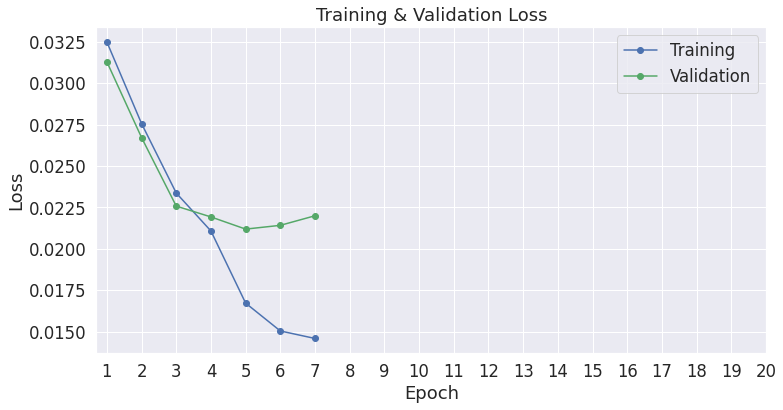

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

plt.show()

In [ ]:
import os


output_dir = 'model_euclidean_dual_bert_1_khan_acad/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)


# model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
# model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

Saving model to model_euclidean_dual_bert_1_khan_acad/


('model_euclidean_dual_bert_1_khan_acad/vocab.txt',
 'model_euclidean_dual_bert_1_khan_acad/special_tokens_map.json',
 'model_euclidean_dual_bert_1_khan_acad/added_tokens.json')

In [ ]:
# !pip install joblib
# import joblib
# joblib.dump(LE, "label_encoder")


In [ ]:
import json
torch.save(model.state_dict(), os.path.join(output_dir, 'model_weights'))


In [ ]:
!cp -r /content/model_euclidean_dual_bert_1_khan_acad "/content/drive/My Drive/research_lo_content_taxonomy_classification"

In [ ]:
# with open(os.path.join(output_dir, 'model_config.json'), 'w') as f:
#     json.dump(model.config, f)

In [ ]:
!zip -r model_euclidean_cos.zip model_euclidean_cos
# files.download('model_euclidean_1.zip')

  adding: model_euclidean_cos/ (stored 0%)
  adding: model_euclidean_cos/model_weights (deflated 7%)
  adding: model_euclidean_cos/vocab.txt (deflated 53%)
  adding: model_euclidean_cos/special_tokens_map.json (deflated 40%)
  adding: model_euclidean_cos/tokenizer_config.json (stored 0%)


In [ ]:
# !zip -r label_encoder_categorized_reduced.zip label_encoder
# files.download('label_encoder_categorized_reduced.zip')

In [ ]:
test_features = test_features.values
labels = test_labels.values

In [ ]:
test_features

array([' -  What I hope to do in this video is get familiar with the notion of an interval, and also think about ways that we can show an interval, or interval notation. Right over here I have a number line. Let\'s say I wanted to talk about the interval on the number line that goes from negative three to two. So I care about this-- Let me use a different color. Let\'s say I care about this interval right over here. I care about all the numbers from negative three to two. So in order to be more precise, I have to be clear. Am I including negative three and two, or am I not including negative three and two, or maybe I\'m just including one of them. So if I\'m including negative three and two, then I would fill them in. So this right over here, I\'m filling negative three and two in, which means that negative three and two are part of this interval. And when you include the endpoints, this is called a closed interval. Closed interval. And I just showed you how I can depict it on a number

In [ ]:
labels

array(['math>>math1>>x89d82521517266d4:functions',
       'math>>old-ap-calculus-ab>>ab-applications-definite-integrals',
       'economics-finance-domain>>ap-macroeconomics>>economic-iondicators-and-the-business-cycle',
       ...,
       'science>>in-in-class11th-physics>>in-in-system-of-particles-and-rotational-motion',
       'math>>precalculus>>x9e81a4f98389efdf:prob-comb',
       'science>>biology>>dna-as-the-genetic-material'], dtype=object)

In [ ]:
len(list(set(labels)))

416

In [ ]:
test_labels = list(set(labels))
test_set_labels = get_cleaned_taxonomy(test_labels)
test_set_labels[0]

'science health-and-medicine gastrointestinal-system-diseases'

In [ ]:
test_labels[0]

'science>>health-and-medicine>>gastrointestinal-system-diseases'

In [ ]:
label_input_ids = []
label_attention_masks = []
for sent in test_set_labels:

    label_encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    label_input_ids.append(label_encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    label_attention_masks.append(label_encoded_dict['attention_mask'])
label_input_ids = torch.cat(label_input_ids, dim=0)
label_attention_masks = torch.cat(label_attention_masks, dim=0)

In [ ]:
taxonomy_vectors = []
for label_input_id,label_att_mask in zip(label_input_ids,label_attention_masks):
    label_input_id = label_input_id.to(device)
    label_att_mask = label_att_mask.to(device)
    with torch.no_grad():
      outputs = model_label(label_input_id.reshape(1,-1),label_att_mask.reshape(1,-1))
    taxonomy_vectors.append(outputs.cpu().numpy())
taxonomy_vectors = np.vstack(taxonomy_vectors)
taxonomy_vectors.shape


(416, 768)

In [ ]:
# model = MulticlassClassifier('bert-base-uncased')
# # model.load_state_dict(torch.load('model_euclidean_cos/model_weights'))
# model.cuda()

In [ ]:
test_input_ids = []
test_attention_masks = []
for sent in test_features:

    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    test_input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    test_attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
test_input_ids = torch.cat(test_input_ids, dim=0)
test_attention_masks = torch.cat(test_attention_masks, dim=0)
# labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  
test_poincare_tensor = torch.tensor(taxonomy_vectors,dtype=torch.float)

# Create the DataLoader.
# prediction_data = TensorDataset(test_input_ids, test_attention_masks, test_poincare_tensor)
# prediction_sampler = SequentialSampler(prediction_data)
# prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
test_poincare_tensor = torch.tensor(taxonomy_vectors,dtype=torch.float)


In [ ]:
cos = torch.nn.CosineSimilarity(dim=0, eps=1e-6)
def dist_without_grad( u, v):
  sqdist = torch.sum((u - v) ** 2, dim=-1)
  squnorm = torch.sum(u ** 2, dim=-1)
  sqvnorm = torch.sum(v ** 2, dim=-1)
  x = 1 + 2 * sqdist / ((1 - squnorm) * (1 - sqvnorm)) + 1e-7
  z = torch.sqrt(x ** 2 - 1)
  return torch.log(x + z)

In [ ]:
_,indices=torch.sort(distances,descending=True)
indices
mean = torch.mean(embeddings[indices[:50]],dim=0)
mean.shape

torch.Size([80])

In [ ]:
len(labels)

1400

In [ ]:
test_labels = np.array(test_labels)

In [ ]:
label_set = np.array(list(set(categories)))

In [ ]:
torch.topk(dist_without_grad(model2(test_input_ids[0].to('cuda').reshape(1,-1),test_attention_masks[0].to('cuda').reshape(1,-1)),test_poincare_tensor),3,largest=False)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1614: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


torch.return_types.topk(values=tensor([3.1841, 3.1841, 3.1841], device='cuda:0', grad_fn=<TopkBackward>), indices=tensor([839, 682,  15], device='cuda:0'))

In [ ]:
test_set_labels[0]

'science health-and-medicine gastrointestinal-system-diseases'

In [ ]:
def precision(actual, predicted, k):
    act_set = set(actual)
    pred_set = set(predicted[:k])
    result = len(act_set & pred_set) / float(k)
    return result

def recall(actual, predicted, k):
    act_set = set(actual)
    pred_set = set(predicted[:k])
    result = len(act_set & pred_set) / float(len(act_set))
    return result

In [ ]:
test_data['board_syllabus'][20]

'computer science[c++]>>c++ revision tour'

In [ ]:
len(test_labels)

352

In [ ]:
test_poincare_tensor.shape

torch.Size([352, 768])

In [ ]:
len(label_set)

569

In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(test_input_ids)))

# Put model in evaluation mode
model.eval()
cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6)

input_ids = test_input_ids.to('cuda')
attention_masks = test_attention_masks.to('cuda')
test_poincare_tensor = test_poincare_tensor.to('cuda')
# Tracking variables 
predictions , true_labels = [], []
for input_id,attention_mask in zip(input_ids, attention_masks):
  with torch.no_grad():
    outputs = model(input_id.reshape(1,-1),attention_mask.reshape(1,-1))
    
  distances = cos(outputs,test_poincare_tensor) #torch.topk(cos(outputs,test_poincare_tensor),20,largest=True)
  distances,indices = torch.topk(distances,5,largest=True)
  predictions.append(test_labels[indices.cpu().numpy()])
print(len(predictions))
  # max_distance =100000000000000
  # label=None
  # for index,test_poincare in enumerate(test_poincare_tensor):

  #   distance = distanceTo(test_poincare, outputs)
  #   if distance < max_distance:
  #     max_distance = distance
  #     label = index
  # predictions.append(labels[label])
    
# Predict 
# for batch in prediction_dataloader:
#   # Add batch to GPU
#   batch = tuple(t.to(device) for t in batch)
  
#   # Unpack the inputs from our dataloader
#   b_input_ids, b_input_mask, b_labels = batch
  
#   # Telling the model not to compute or store gradients, saving memory and 
#   # speeding up prediction
#   with torch.no_grad():
#       # Forward pass, calculate logit predictions
#       outputs = model(b_input_ids,b_input_mask)

#   logits = outputs
#   for logit in logits:
#     max_similarity = 0


#   # Move logits and labels to CPU
#   logits = logits.detach().cpu().numpy()
#   label_ids = b_labels.to('cpu').numpy()
  
#   # Store predictions and true labels
#   predictions.append(logits)
#   true_labels.append(label_ids)

print('    DONE.')
# predictions

Predicting labels for 1,047 test sentences...
1047
    DONE.


In [ ]:
labels

array(['math>>math1>>x89d82521517266d4:functions',
       'math>>old-ap-calculus-ab>>ab-applications-definite-integrals',
       'economics-finance-domain>>ap-macroeconomics>>economic-iondicators-and-the-business-cycle',
       ...,
       'science>>in-in-class11th-physics>>in-in-system-of-particles-and-rotational-motion',
       'math>>precalculus>>x9e81a4f98389efdf:prob-comb',
       'science>>biology>>dna-as-the-genetic-material'], dtype=object)

In [ ]:
!pip install tensorflow==1.13.1

In [ ]:
from sklearn .preprocessing import LabelEncoder
LE= LabelEncoder()
labels = LE.fit_transform(labels)
labels

array([238, 254,   2, ..., 386, 283, 324])

In [ ]:
labels=test_data['hierarchy'].values

In [ ]:
LE.inverse_transform([325])

array(['science>>biology>>ecology'], dtype=object)

In [ ]:
labels

array([238, 254,   2, ..., 386, 283, 324])

In [ ]:
final_predictions = []
for prediction in predictions:
  final_predictions.append(LE.transform(prediction))


In [ ]:
final_predictions[-3]

array([183, 148, 182,  30, 185])

In [ ]:
y_true

<tf.Tensor 'Identity_44:0' shape=(2664,) dtype=int64>

In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 20
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, k=20)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, k=20)

tmp_rank = tf.nn.top_k(y_pred, 20)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    # print("precision",sess.run(update_precision))
    # print("precision",s|ess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(1047, 20) (1047,)
update_recall:  0.5759312320916905
recall 0.5759312320916905
STREAM_VARS:  [603.0, 444.0, 0.0, 0.0]
TMP_RANK:  TopKV2(values=array([[279, 196, 194, ..., 112, 110, 109],
       [275, 274, 273, ..., 158, 156, 122],
       [ 20,  19,  18, ...,   2,   1,   0],
       ...,
       [233, 232, 231, ..., 170, 148,  30],
       [205, 199, 188, ...,  23,  22,  21],
       [372, 371, 364, ..., 301, 300, 299]]), indices=array([[ 8, 19, 15, ...,  2,  1,  5],
       [ 7, 18, 16, ...,  8, 17, 11],
       [ 4, 19,  9, ...,  8, 12, 13],
       ...,
       [19, 16, 12, ...,  7,  1,  3],
       [15,  2,  1, ..., 13, 14, 17],
       [14,  9, 19, ..., 12,  5,  4]], dtype=int32))


In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 8
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, 15)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, 15)

tmp_rank = tf.nn.top_k(y_pred, 15)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(1047, 15) (1047,)
precision 0.033110474371219355
update_recall:  0.49665711556829034
recall 0.49665711556829034
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 520.0, 527.0, 520.0, 15185.0]
TMP_RANK:  TopKV2(values=array([[279, 193, 192, ..., 112, 110, 109],
       [275, 267, 252, ..., 159, 158, 122],
       [ 20,  18,  17, ...,   2,   1,   0],
       ...,
       [231, 207, 204, ..., 170, 148,  30],
       [199, 188, 145, ...,  24,  23,  22],
       [372, 371, 343, ..., 301, 300, 299]]), indices=array([[ 8,  3,  6, ...,  2,  1,  5],
       [ 7,  6,  4, ...,  0,  8, 11],
       [ 4,  9, 14, ...,  8, 12, 13],
       ...,
       [12, 13,  5, ...,  7,  1,  3],
       [ 2,  1,  0, ..., 12, 13, 14],
       [14,  9, 13, ..., 12,  5,  4]], dtype=int32))


In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 8
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, 10)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, 10)

tmp_rank = tf.nn.top_k(y_pred, 10)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(y_pred))

(1047, 10) (1047,)
precision 0.04021012416427889
update_recall:  0.40210124164278893
recall 0.40210124164278893
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 421.0, 626.0, 421.0, 10049.0]
TMP_RANK:  [[113 110 112 ... 136 279 142]
 [159 248 251 ... 275 158 160]
 [  3   4  12 ...  15   2  18]
 ...
 [183 148 182 ... 170 198 178]
 [145 188 199 ...  26  28  27]
 [325 327 326 ... 331 324 371]]


In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 8
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, 5)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, 5)

tmp_rank = tf.nn.top_k(y_pred, 5)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(1047, 5) (1047,)
precision 0.047182425978987586
update_recall:  0.23591212989493793
recall 0.23591212989493793
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 247.0, 800.0, 247.0, 4988.0]
TMP_RANK:  TopKV2(values=array([[193, 114, 113, 112, 110],
       [252, 251, 250, 248, 159],
       [ 20,  12,   6,   4,   3],
       ...,
       [185, 183, 182, 148,  30],
       [199, 188, 145, 141,  52],
       [327, 326, 325, 304, 299]]), indices=array([[3, 4, 0, 2, 1],
       [4, 2, 3, 1, 0],
       [4, 2, 3, 1, 0],
       ...,
       [4, 0, 2, 1, 3],
       [2, 1, 0, 4, 3],
       [1, 2, 0, 3, 4]], dtype=int32))


In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 8
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, 1)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, 1)

tmp_rank = tf.nn.top_k(y_pred, 1)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(4784, 1) (4784,)
precision 0.4280936454849498
update_recall:  0.4280936454849498
recall 0.4280936454849498
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2048.0, 2736.0, 2048.0, 2736.0]
TMP_RANK:  TopKV2(values=array([[ 66],
       [176],
       [116],
       ...,
       [ 49],
       [  8],
       [152]]), indices=array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32))


In [ ]:
y_true = np.array(labels)
final_predictions = np.array(final_predictions).squeeze()
final_predictions.shape
len(final_predictions[final_predictions==y_true])/len(labels)

0.43415551839464883

In [ ]:
categories

In [ ]:
!cp /content/model_euclidean_cos.zip "/content/drive/My Drive/research_lo_content_taxonomy_classification"

print('Positive samples: %d of %d (%.2f%%)' % (final_data.label.sum(), len(final_data.label), (final_data.label.sum() / len(final_data.label) * 100.0)))

In [ ]:
pred =  np.argmax(predictions[0],axis=1).flatten()
pred

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(labels)):
  
  # The predictions for this batch are a 2-column ndarray (one column for "0" 
  # and one column for "1"). Pick the label with the highest value and turn this
  # in to a list of 0s and 1s.
  # pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  # Calculate and store the coef for this batch.  
  matthews = matthews_corrcoef(np.array(labels[i]), np.array(predictions[i])   )             
  matthews_set.append(matthews)

In [ ]:
ax = sns.barplot(x=list(range(len(matthews_set))), y=matthews_set, ci=None)

plt.title('MCC Score per Batch')
plt.ylabel('MCC Score (-1 to +1)')
plt.xlabel('Batch #')

plt.show()

In [ ]:
flat_predictions = np.array(predictions)
from sklearn.metrics import matthews_corrcoef

# flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.array(labels)

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('Total MCC: %.3f' % mcc)

Total MCC: 0.000


In [ ]:
list_bool = (flat_true_labels==flat_predictions)
print(list_bool)
print(len([i for i, val in enumerate(list_bool) if val]))
len(flat_predictions)

[False False False ... False False False]
68


2664

In [ ]:
print('Total MCC: %.3f' % mcc)

Total MCC: 0.023


In [ ]:
len(flat_predictions[flat_predictions==flat_true_labels])/len(flat_predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


0.0

In [ ]:
flat_predictions[:40]

array(['social science>>civics : social and political life - ii>>how the state government works',
       'physical science>>physical science (chemistry)>>synthetic fibres and plastics>>plastics',
       'science>>physical and chemical changes',
       'social science>>civics : social and political life - ii>>how the state government works',
       'computer science[c++]>>arrays',
       'computer science[c++]>>standard library functions',
       'computer science[c++]>>inheritance: extending classes',
       'computer science[c++]>>inheritance: extending classes',
       'science>>reproduction in animals',
       'social science>>history : our pasts - iii>>weavers, iron smelter & factory owners',
       'social science>>civics : social and political life-i>>key elements of a democratic government',
       'science>>materials : metals and non-metals',
       'physics>>physics : part - i>>physical world',
       'computer science[c++]>>inheritance: extending classes',
       'science>>so

In [ ]:
flat_true_labels[:40]

array(['social science>>civics : social and political life - ii>>how the state government works',
       'science>>electricity and circuits', 'science>>changes around us',
       'social science>>civics : social and political life - ii>>understanding advertising',
       'computer science[c++]>>programming methodology',
       'computer science[c++]>>structured query language',
       'computer science[c++]>>object oriented programming',
       'computer science[c++]>>general oop concepts',
       'science>>how do organisms reproduce?',
       'social science>>history : our pasts - iii>>ruling the countryside',
       'social science>>civics : social and political life>>the indian constitution',
       'physical science>>physical science (chemistry)>>metals and non-metals>>metals',
       'physics>>physics : part - i>>motion in straight line',
       'computer science[c++]>>structured query language',
       'physics>>physics : part - i>>laws of motion',
       'social science>>civics 